In [452]:
import numpy as np
import pandas as pd
import xarray
import seaborn as sns
import matplotlib.pyplot as plt

In [477]:
df1 = pd.read_excel("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis3_LUC/crop_footprint_image_region_v2.xlsx")
df1b = pd.read_csv("D:/kerja/asisten riset/vol/milkunC/achaidir/FAO/carbon_footprint_am3.csv")
df2 = pd.read_csv("D:/kerja/asisten riset/vol/milkunC/achaidir/IMAGE PBL/SSP2/GFRAC Area Harvested.csv")
df3 = pd.read_csv("D:/kerja/asisten riset/vol/milkunC/achaidir/IMAGE PBL/SSP2/GFRAC Area HarvestedRegionType_fulll.csv")

In [478]:
df3[df3['value'] <= 0]

,IMAGE Region Name,NGFBFC,time,value
187,C. Europe,Oil & palm fruit,1970,0.0
188,C. Europe,Oil & palm fruit,1975,0.0
189,C. Europe,Oil & palm fruit,1980,0.0
190,C. Europe,Oil & palm fruit,1985,0.0
191,C. Europe,Oil & palm fruit,1990,0.0
...,...,...,...,...
4594,W. Europe,Oil & palm fruit,2005,0.0
4595,W. Europe,Oil & palm fruit,2010,0.0
4596,W. Europe,Oil & palm fruit,2015,0.0
4597,W. Europe,Oil & palm fruit,2020,0.0


np.average

## opsi 1 2020 saja maize

In [463]:
df3['IMAGE Region Name'].unique()

array(['Brazil', 'C. Europe', 'Canada', 'China', 'E. Africa', 'India',
       'Indonesia', 'Japan', 'Kazakhstan region', 'Korea', 'Mexico',
       'Middle East', 'N. Africa', 'N|A', 'Oceania', 'Rest C. America',
       'Rest S. Africa', 'Rest S. America', 'Rest S. Asia', 'Russia',
       'SE. Asia', 'South Africa', 'Turkey', 'USA', 'Ukraine region',
       'W. Africa', 'W. Europe'], dtype=object)

In [479]:
df1b = df1b[df1b['IMAGE Region Name'] != 'N|A']
df3 = df3[df3['IMAGE Region Name'] != 'N|A']

In [465]:
maize_areaharvested1 = df3[(df3['NGFBFC'] ==  "Maize") & (df3['time'] == 2020)]['value'].to_numpy()
maize_areaharvested1

array([2.27406998e+07, 5.73037587e+06, 1.71724345e+06, 3.93398969e+07,
       7.04040149e+06, 9.98872051e+06, 3.70717925e+06, 9.93457673e+01,
       3.08699665e+05, 5.82823372e+05, 7.95845506e+06, 3.96376099e+05,
       1.33617597e+05, 1.09280804e+05, 2.32609176e+06, 1.25594909e+07,
       8.54387264e+06, 2.62275836e+06, 3.18686012e+06, 5.88958286e+06,
       2.87844317e+06, 7.48217488e+05, 3.14146925e+07, 5.72547113e+06,
       1.74939017e+07, 3.83883826e+06])

In [466]:
maize = np.nan_to_num(df1b[df1b['NGFBFC'] == "Maize"]['Carbon Footprint'].to_numpy())
maize

array([1.83600089e+01, 4.78026885e-01, 6.86013727e-02, 8.87766764e-02,
       2.87203545e+00, 4.72459330e-01, 3.58579722e-01, 4.15232866e+01,
       2.05374004e-01, 2.99379197e+00, 7.64660709e-01, 3.91246907e-02,
       2.46882339e+00, 1.00977679e+00, 4.76788703e+01, 1.80262138e+00,
       4.13776801e+00, 5.09851840e-01, 1.37436008e-01, 2.99202155e+01,
       2.66691912e-01, 2.51909505e+00, 5.90489439e-01, 6.90784703e-02,
       3.84817020e-02, 2.06069018e-01])

In [467]:
opsi1 = np.average(maize, weights=maize_areaharvested1)
opsi1

4.20568480588941

In [480]:
data1 = np.zeros((16, 26), dtype='float32')
weight1 = np.zeros((16, 26), dtype='float32')
result_avg = np.zeros((16), dtype='float32')

for i, ngfbfc in enumerate(df1b['NGFBFC'].unique()):
    NGFBFC_areaharves2020 = df3[(df3['NGFBFC'] ==  ngfbfc) & (df3['time'] == 2020)]['value'].replace([np.inf, -np.inf], np.nan).to_numpy()
    cf = df1b[df1b['NGFBFC'] == ngfbfc]['Carbon Footprint'].replace([np.inf, -np.inf], np.nan).to_numpy()
    data1[i] = np.nan_to_num(cf)
    weight1[i] = np.nan_to_num(NGFBFC_areaharves2020)

for x in range(0, 16):
    result_avg[x] = np.average(data1[x], weights=weight1[x])


In [482]:
df_avg = pd.DataFrame(result_avg, index=df3['NGFBFC'].unique())
df_avg = df_avg.reset_index()
df_avg = df_avg.rename(columns={"index":'NGFBFC', 0:"value"})
df_avg = df_avg.sort_values(by=['value'], ascending=[False])
df_avg

,NGFBFC,value
8,Sugar crops,30.043146
2,Other non-food & luxury & spices,11.098939
6,Rice,9.997065
4,Plant based fibres,8.480935
12,Tropical oil crops,8.452772
5,Pulses,7.975793
13,Tropical roots & tubers,7.604362
11,Tropical cereals,6.101604
7,Soybeans,5.845153
0,Maize,4.205685


### opsi 2 sum 75-20

In [53]:
maize_areaharvested2 = df3[df3['NGFBFC'] ==  "Maize"].groupby(['IMAGE Region Name']).sum()['value'].to_numpy()
maize_areaharvested2

array([1.65233191e+08, 7.11894143e+07, 1.47740506e+07, 2.73985771e+08,
       4.49402770e+07, 7.75700314e+07, 3.51947654e+07, 2.01845600e+04,
       3.73172828e+06, 6.89735351e+06, 8.01685402e+07, 2.50908282e+06,
       1.95938768e+06, 0.00000000e+00, 1.89363997e+06, 2.27596898e+07,
       8.84936510e+07, 6.75475853e+07, 2.21359946e+07, 1.69938839e+07,
       5.67917878e+07, 4.16384648e+07, 6.80389880e+06, 3.22585162e+08,
       3.09298380e+07, 9.79018314e+07, 4.51438495e+07])

In [54]:
opsi2 = np.average(maize, weights=maize_areaharvested2)
opsi2

4.271017381944207

In [125]:
data2 = np.zeros((16, 26), dtype='float32')
weight2 = np.zeros((16, 26), dtype='float32')
result_avg2 = np.zeros((16), dtype='float32')

for i, ngfbfc in enumerate(df1b['NGFBFC'].unique()):
    NGFBFC_areaharves2020 = df3[df3['NGFBFC'] ==  ngfbfc].groupby(['IMAGE Region Name']).sum()['value'].replace([np.inf, -np.inf], np.nan).to_numpy()
    cf = df1b[df1b['NGFBFC'] == ngfbfc]['Carbon Footprint'].replace([np.inf, -np.inf], np.nan).to_numpy()
    data2[i] = np.nan_to_num(cf)
    weight2[i] = np.nan_to_num(NGFBFC_areaharves2020)

for x in range(0, 16):
    try:
        result_avg2[x] = np.average(data2[x], weights=weight2[x])
    except:
        print("nilai tersebut 0")

nilai tersebut 0


In [484]:
df_footprint_region = df1b.replace([np.inf, -np.inf], np.nan).fillna(0)
df_footprint_region['NGFBFC'] = df_footprint_region['NGFBFC'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices')
df_footprint_region['NGFBFC'] = df_footprint_region['NGFBFC'].replace('other temperate cereals', 'temperate cereals')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')
# average = df_footprint_region.groupby(['IMAGE Region Name', 'NGFBFC'])['Carbon Footprint'].mean().to_frame('Mean')
# average1 = average.reset_index()
# average1_filtered = average1[average1['Mean'] < 100]
# results = {}

# average = average1.sort_values(by=['Mean', 'NGFBFC'], ascending=[True, True])

# for country in average['IMAGE Region Name'].unique():
#     for category in average['NGFBFC'].unique():
#         filtered_data = average[average['NGFBFC'] == category]
#         sorted_data = filtered_data.sort_values(by='Mean', ascending=False)
#         top_5_data = sorted_data.head(5)
#         results[category] = top_5_data

# df_footprint_df = pd.concat([pd.concat(results.values())])

# df_footprint_df_filtered = df_footprint_df[df_footprint_df['Mean'] < 100]

In [485]:
# average1_filtered.index = average1_filtered['NGFBFC'].values
# average1_filtered.reindex()

df_footprint_region_table = pd.pivot_table(data=df_footprint_region, index=['NGFBFC', 'time'], columns=['IMAGE Region Name'])
df_footprint_region_index = df_footprint_region_table.stack(level=0, future_stack=True)
df_footprint_region_index = df_footprint_region_index.reset_index()
df_footprint_region_index = df_footprint_region_index.drop(columns=['level_2'])
df_footprint_region_index = df_footprint_region_index.drop(columns=['time'])
df_footprint_region_index.index = df_footprint_region_index['NGFBFC'].values
df_footprint_region_index = df_footprint_region_index.reindex(df_avg['NGFBFC'].values)
average1_melt = df_footprint_region_index.melt(id_vars=['NGFBFC'], value_name='value') 

# average = average1_melt.groupby(['IMAGE Region Name', 'NGFBFC'])['value'].mean().to_frame('Mean')
# average1 = average.reset_index()

average1_filtered = average1_melt[average1_melt['value'] < 110]

results = {}
average = average1_melt.sort_values(by=['value', 'NGFBFC'], ascending=[True, True])

for country in average1_melt['IMAGE Region Name'].unique():
    for category in average['NGFBFC'].unique():
        filtered_data = average[average['NGFBFC'] == category]
        sorted_data = filtered_data.sort_values(by='value', ascending=False)
        top_5_data = sorted_data.head(5)
        results[category] = top_5_data

df_footprint_df = pd.concat([pd.concat(results.values())])

df_footprint_df_filtered = df_footprint_df[df_footprint_df['value'] < 100]

average1_filtered[0:17]

,NGFBFC,IMAGE Region Name,value
0,Sugar crops,Brazil,4.448221
1,Other non-food & luxury & spices,Brazil,23.705179
2,Rice,Brazil,61.346283
3,Plant based fibres,Brazil,108.937989
4,Tropical oil crops,Brazil,59.946962
5,Pulses,Brazil,43.577523
6,Tropical roots & tubers,Brazil,45.833408
7,Tropical cereals,Brazil,4.477166
8,Soybeans,Brazil,7.896657
9,Maize,Brazil,18.360009


In [486]:
from scipy.interpolate import make_interp_spline

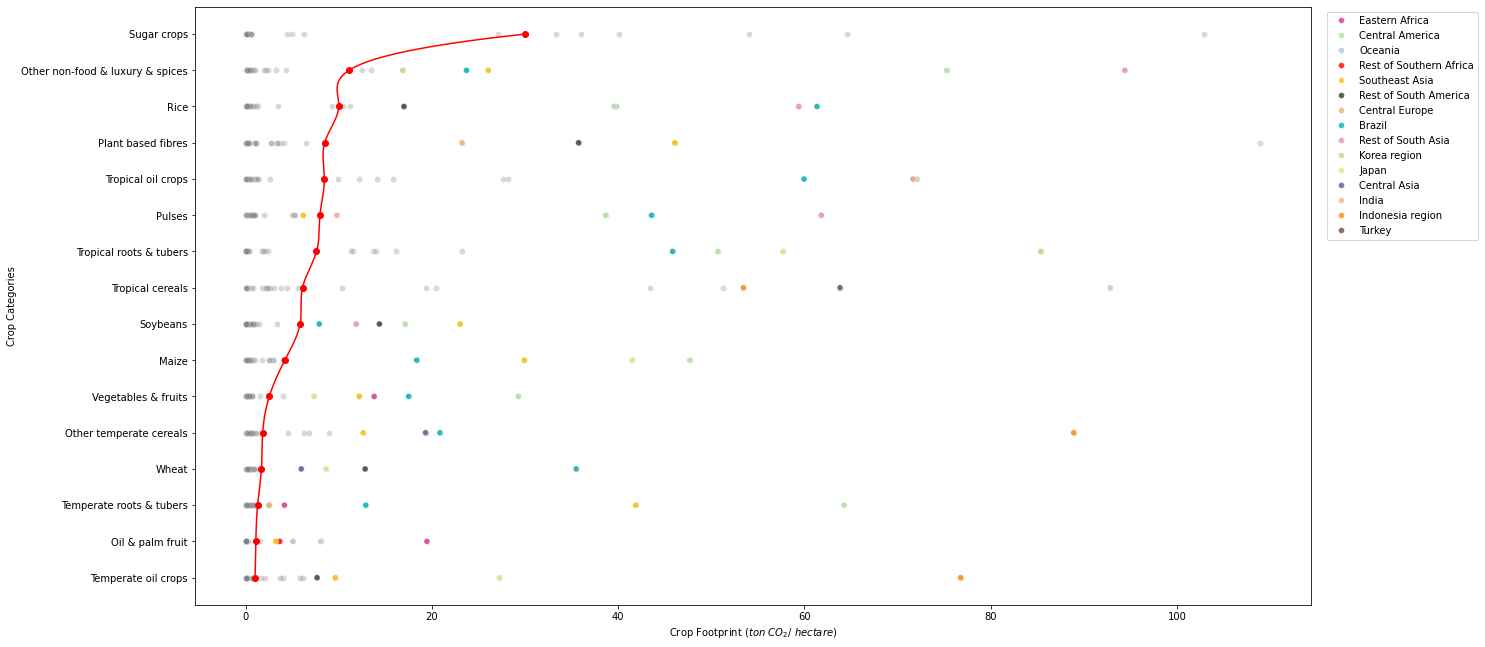

In [487]:
from scipy.interpolate import make_interp_spline

fig, ax = plt.subplots(figsize=(20, 11))

palettes = {'Oceania': '#B3C8CF','Japan':'#E5E483','Korea region':'#D2D180','China region':'#B2B377','Rest of South Asia':'#EF9595',
                'India':'#EFB495','Indonesia region':'#FF8A08','Southeast Asia':'#FFC100','Middle East':'#1B1A55','Central Asia':'#535C91',
                'Russia region':'#9290C3',
                'Rest of Southern Africa':'#FF0000','South Africa':'#710019','Eastern Africa':'#D43790','Western Africa':'#EC8FD0','Northern Africa':'#F2C5E0',
                'Turkey':'#6F4E37','Ukraine region':'#A67B5B','Central Europe':'#ECB176','Western Europe':'#FED8B1',
                'Rest of South America':'#254336','Brazil':'#00b2b2','Central America':'#B3E2A7','Mexico':'#003285','USA':'#40A2E3','Canada':'#BBE2EC'}

ax.set_xlabel('Crop Footprint ($ton~CO_2/~hectare$)')
ax.set_ylabel('Crop Categories')
sns.scatterplot(x="value", y="NGFBFC", color='grey',
                sizes=(100, 300), alpha=.3, data=average1_filtered)

sns.scatterplot(x="value", y="NGFBFC", hue='IMAGE Region Name',
                sizes=(100, 300), alpha=.8, palette=palettes, data=df_footprint_df_filtered)
ax.legend(bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')

categories = average1_filtered['NGFBFC'].unique()

# Mapping kategori ke indeks
category_indices = np.arange(len(categories))
category_to_index = {category: index for index, category in enumerate(categories)}

# Mengonversi kategori ke indeks
y_indices = np.array([category_to_index[category] for category in categories])

# Interpolasi spline untuk membuat garis lebih halus
xnew = np.linspace(y_indices.min(), y_indices.max(), 300)
spl = make_interp_spline(y_indices, df_avg['value'].to_numpy(), k=3)
y_smooth = spl(xnew)

# Plotting garis yang diinterpolasi
ax.plot(y_smooth, xnew, linestyle='-', color='red', label='Line')
ax.plot(df_avg['value'].to_numpy(), df_avg['NGFBFC'].to_numpy(), 'o', color='red', label='Average Line')

plt.show()